## Forecasting Stock Prices - Monte Carlo Simulation

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

ticker = 'MSFT' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2000-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

drift.values
stdev.values

t_intervals = 250
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [2]:
S0 = data.iloc[-1]
S0

MSFT    258.089996
Name: 2022-09-07 00:00:00, dtype: float64

Create a variable price_list with the same dimension as the daily_returns matrix. 

In [4]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Set the values on the first row of the price_list array equal to S0.

In [6]:
price_list[0] = S0
price_list

array([[258.08999634, 258.08999634, 258.08999634, ..., 258.08999634,
        258.08999634, 258.08999634],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

Create a loop in the range (1, t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t.

In [7]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

price_list

array([[258.08999634, 258.08999634, 258.08999634, ..., 258.08999634,
        258.08999634, 258.08999634],
       [252.01644532, 254.42810201, 249.07372648, ..., 253.5596441 ,
        252.30599525, 247.53220137],
       [260.06719943, 257.2182652 , 248.12672302, ..., 254.75420009,
        253.4305121 , 250.92772512],
       ...,
       [341.24690026, 164.57226524, 324.49965718, ..., 199.35480196,
        240.08443396, 326.45336725],
       [333.6606114 , 166.29666127, 330.7901178 , ..., 202.00091607,
        243.44937029, 334.06094392],
       [334.68180868, 167.54134688, 331.48276663, ..., 202.36005073,
        245.15341258, 327.95349132]])

Finally, plot the obtained price list data.

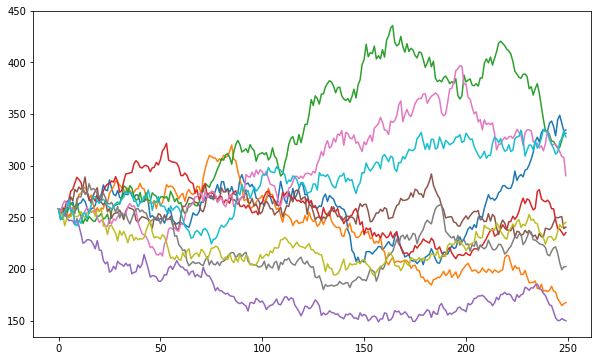

In [8]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

From the graph showing above, we obtained 10 possible paths for Microsoft stock price

When we run a Monte Carlo simulation, we are interested in observing the different possible
realizations of a future event. What happens in real life is just one of the possible outcomes of any
event.

And that’s where a Monte Carlo simulation comes in handy. We can use past data, something we
already know, to create a simulation – a new set of fictional but sensible data. These realizations are
generated by observing the distribution of the historical data and calculating its mean and variance.

Such information is valuable, as it allows us to consider a good proxy of the probability of different
outcomes and can help us make an informed decision. 